# Introduction
We used our Fact Checker tool to test the accuracy of claims generated by 5 Large Language models: GPT-3.5, GPT-4, LLAMA-7B, LLAMA-13B and LLAMA-70B.


## Methodology

1000 prompts from 10 categories were fed into 5 LLMs to generate a dataset of claims. The prompts included direct questions e.g *'What caused child labour to decrease in the 20th century?'*, *'In what month does the Summer Under the Stars event take place?'*, and requests for more information e.g. *'In the 1770s Pierre Jaquet-Droz, a Swiss watchmaker, built a mechanical doll (automata) that could write holding a quill pen. Tell me more about this.'*, etc. 

These dataset of claims were then fed into Originality.ai's Fact-Checker Tool. The results were processed and analyzed.

## Key Findings

* Model Accuracy: The LLAMA-13B (76.9%) had the best performance i.e. scored the most accurate claims, while GPT-4 (67.9%) had the worse performance.

* Performance per topic category: The category of claims that had the average highest scores was Health (80.5%) and the worst category was News (64.4%).

* Model Confidence: The LLAMA-7B, LLAMA-13B and LLAMA-70B models attempted every prompt. GPT-3.5 and GPT-4 attempted approximately 97% of the prompts, responding with replies like : "I'm sorry, but I don't have access to specific data on the reduction of malarial mortality by the National Malaria Protection Unit from 1998-2006.", etc to certain prompts. (With respect to Methodology, these points were scored as 0.5)

# The Data
5 datasets for each of the LLM models was generated. Each dataset had 1000 records, with 8 columns: 

* 'topic' - the broad category of the prompt
* 'prompt' - the prompts
* 'claim' - the LLM's response to the prompt
* 'label' - True/False of the claim, boolean record that is later converted to int for analysis 
* 'explanation' - explanation text from the Originality.AI Fact Detector
* 'urls' - supporting URLs
* 'error' and 'message' - error reporting features

The datasets were then condensed into a pivot table with the topics as rows, models as columns and the average scores as values.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from get_data import *

In [2]:
df, main_df = generate_pivot_table()

,GPT-3.5,GPT-4,LLAMA-7B,LLAMA-13B,LLAMA-70B
topic,,,,,
climate,71.0,72.0,74.0,83.0,78.0
economics,65.5,55.5,67.0,67.0,71.0
entertainment,77.0,72.5,78.0,77.0,83.0
geography,73.0,64.5,83.0,76.0,79.0
health,78.5,74.0,85.0,82.0,83.0
history,71.0,66.0,79.0,78.0,74.0
news,55.5,56.5,70.0,71.0,69.0
politics,70.0,76.0,82.0,76.0,82.0
sports,66.0,71.5,65.0,74.0,68.0


# Results 
The results are described in 2 sections: 
- Accuracy Scores
- Confidence Score


## Accuracy Scores
- Average accuracy of each LLM model in all topics
- Average accuracy of all the models in each topic

,GPT-4,GPT-3.5,LLAMA-7B,LLAMA-70B,LLAMA-13B
0,67.9,70.15,76.0,76.8,76.9


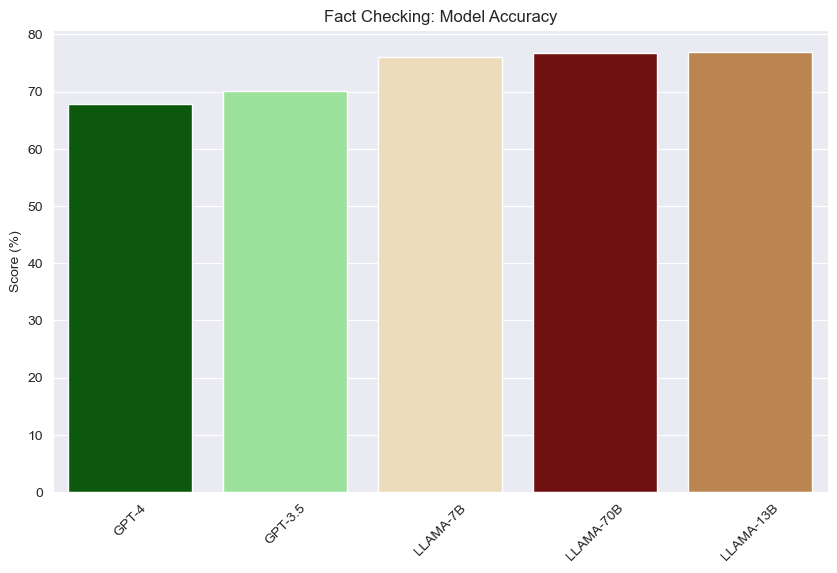

topic,news,economics,sports,history,geography,climate,politics,technology,entertainment,health
0,64.4,65.2,68.9,73.6,75.1,75.6,77.2,77.5,77.5,80.5


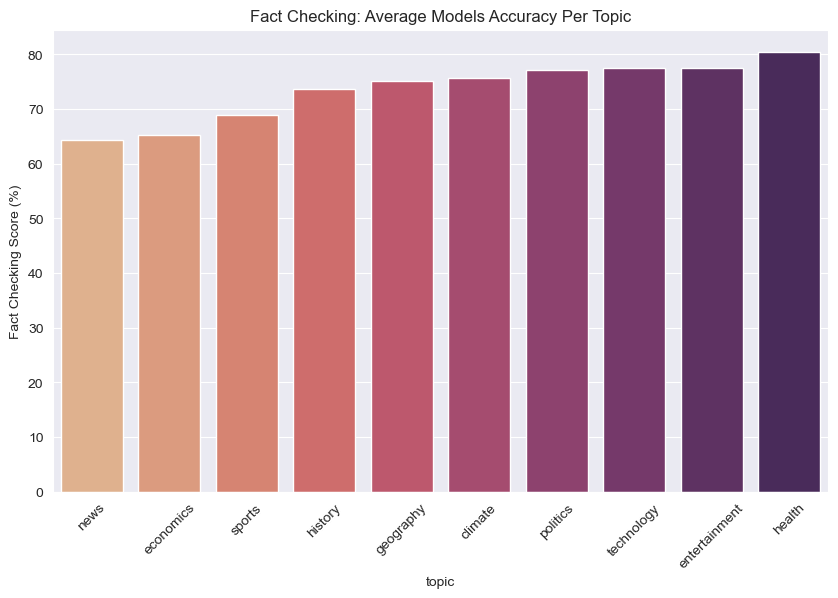

In [3]:
viz_performances(df)

## Confidence Scores
- Confidence of each model i.e. the number of prompts answered/ the total number of prompts. Both GPT models scored less than 100%.

,GPT-3.5,GPT-4,LLAMA-7B,LLAMA-13B,LLAMA-70B
0,97.1,97.2,100.0,100.0,100.0


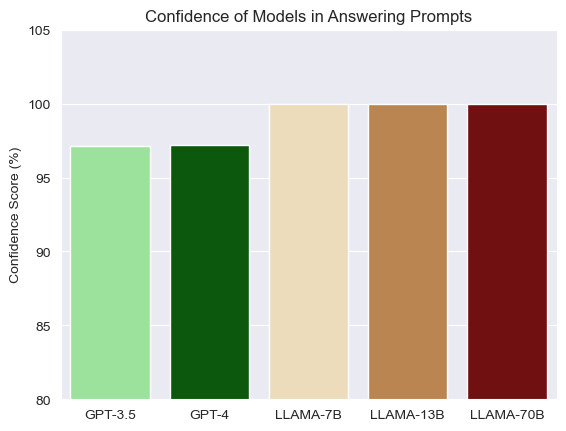

In [4]:
viz_confidence_chart(df, main_df)

# Analysis:
The accuracy was analyzed according to topic and models with visualizations.

## Heat Map

This illustrates the accuracy distribution between the LLM models and the topics

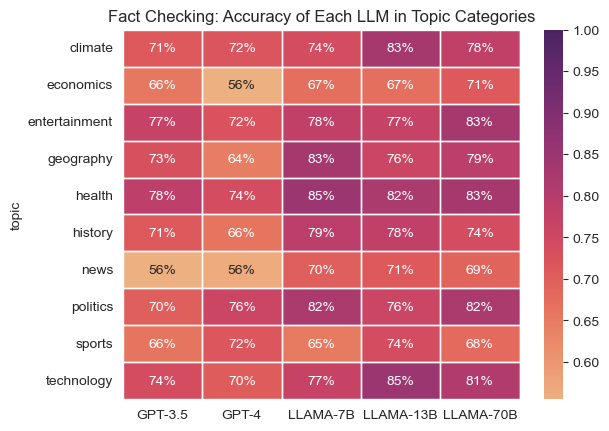

In [5]:
viz_heatmap(df)

## Topic vs Model: Which model performed best in each topic

In [6]:
topic_performance = {topic: [df.columns[df.loc[topic].argmax()], df.loc[topic].max()] for topic in df.index}
topic_performance = pd.DataFrame.from_dict(topic_performance, 
                                          orient='index',
                                          columns=['model', 'accuracy score']
                                          ).sort_values('accuracy score', ascending=False)
display(topic_performance)

,model,accuracy score
health,LLAMA-7B,0.85
technology,LLAMA-13B,0.85
climate,LLAMA-13B,0.83
entertainment,LLAMA-70B,0.83
geography,LLAMA-7B,0.83
politics,LLAMA-7B,0.82
history,LLAMA-7B,0.79
sports,LLAMA-13B,0.74
economics,LLAMA-70B,0.71
news,LLAMA-13B,0.71


## Model vs Topic: where each model performed best

In [7]:
model_performance = {model: [df.index[df[model].argmax()], df[model].max()] for model in df.columns}
model_performance = pd.DataFrame.from_dict(model_performance,
                                          orient='index', 
                                          columns=['topic', 'accuracy score']
                                          ).sort_values('accuracy score', ascending=False)
display(model_performance)

,topic,accuracy score
LLAMA-7B,health,0.850
LLAMA-13B,technology,0.850
LLAMA-70B,entertainment,0.830
GPT-3.5,health,0.785
GPT-4,politics,0.760


# Summary 

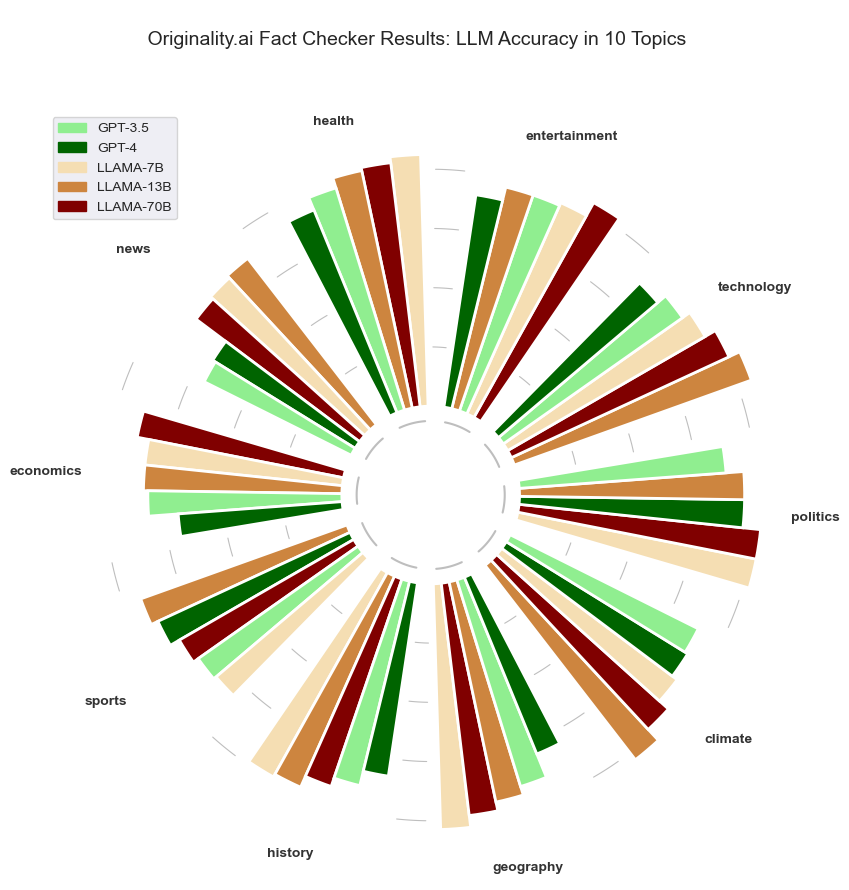

In [8]:
import polar_chart

# Appendix
Visualizing each model's performance per topic. The same data as provided above but in model-specific presentation.

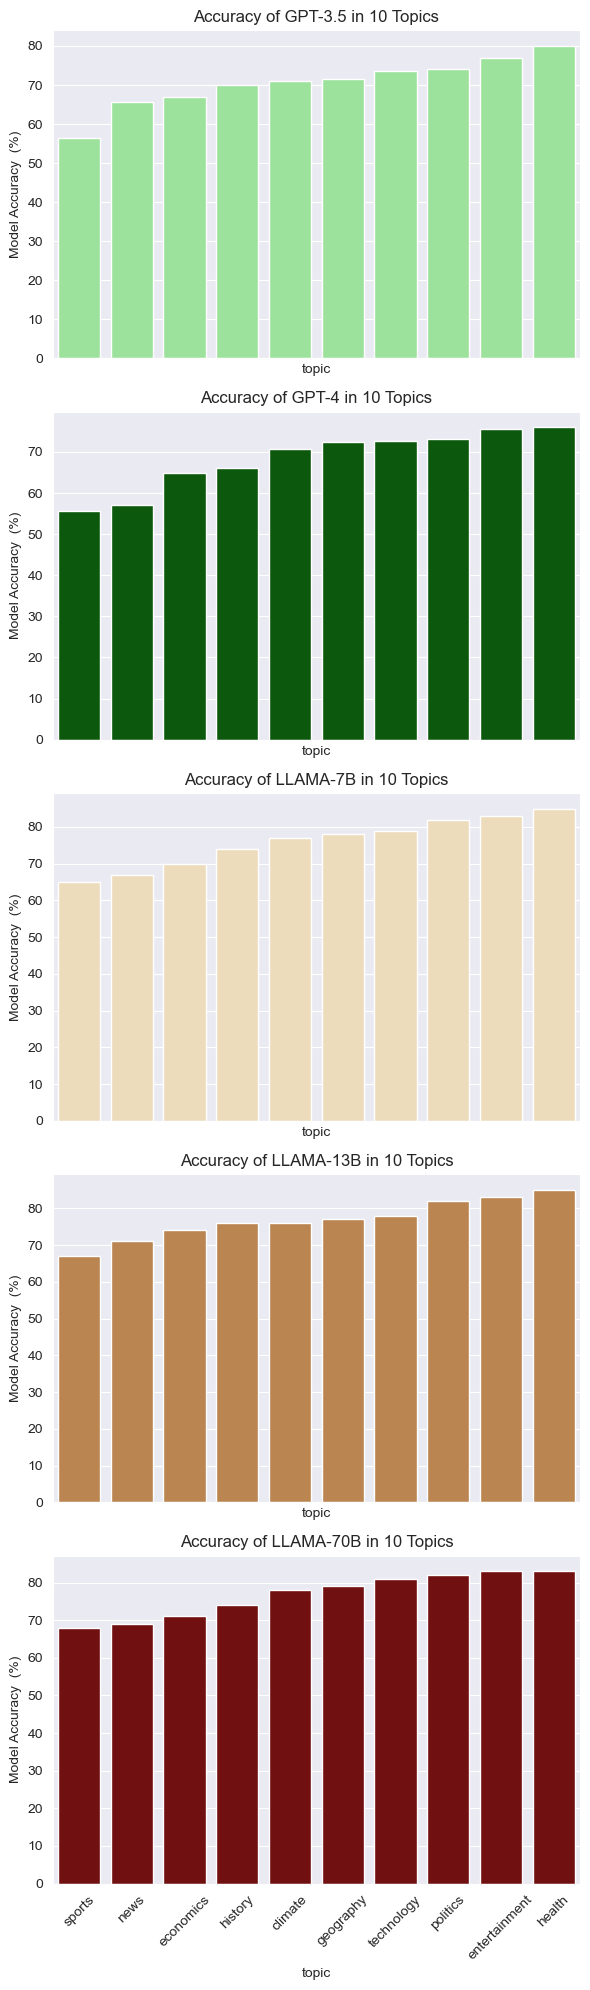

In [9]:
viz_llm()